# Chapter3

In [1]:
tbl <- read.csv("data/access.csv", encoding = "UTF-8") # access.csvをtblに代入
m <- mean(tbl$アクセス数)                         # アクセス数の平均をmに代入
print(m)                                          # コンソールに出力

[1] 347.3667


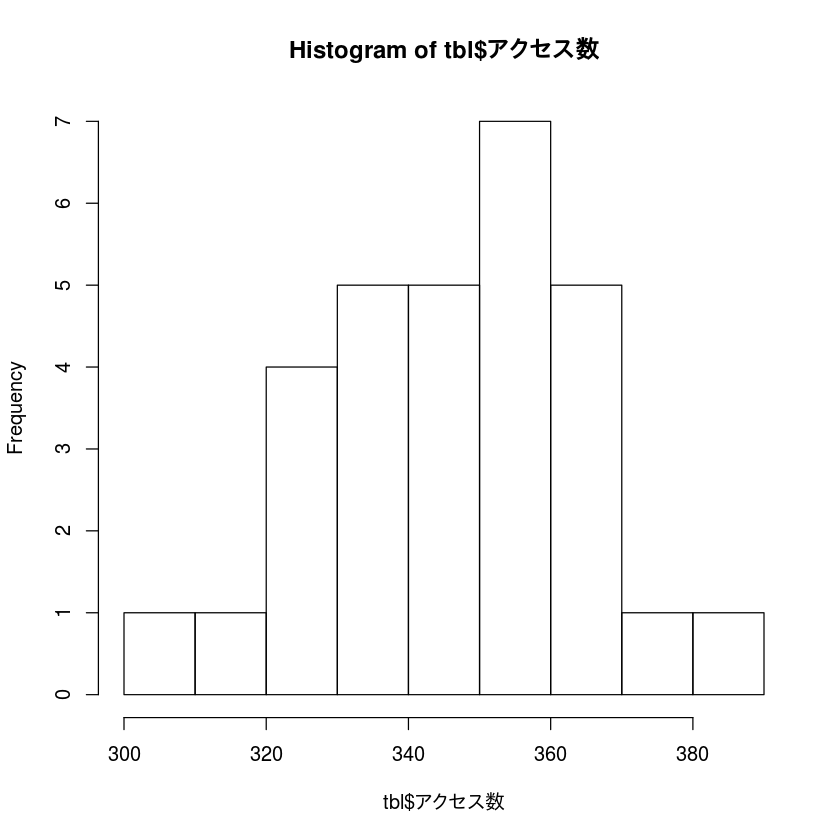

In [2]:
hist(tbl$アクセス数)

In [3]:
fn <- fivenum(tbl$アクセス数)

In [4]:
fn

[1] 308 334 349 360 387

In [5]:
signif(305, 2)

[1] 300

In [8]:
signif(306, 2)

[1] 310

In [10]:
cl <- 10
min <- signif(fn[1], 2) - cl * 2
max <- fn[5] + cl *2

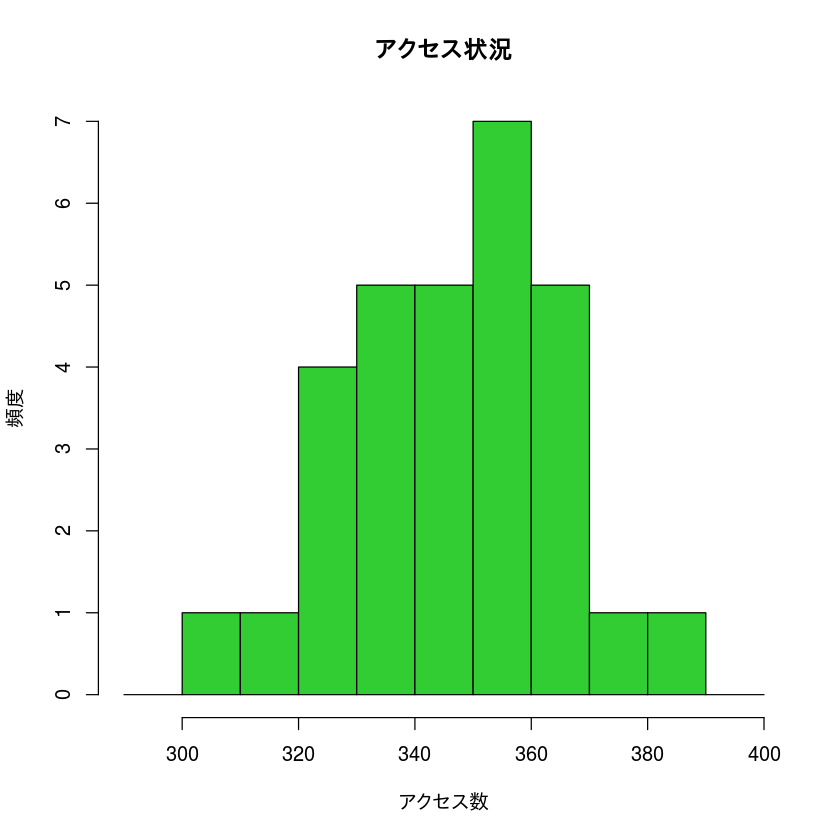

In [11]:
hist(
  tbl$アクセス数,        # ヒストグラムにするデータを指定
  breaks = seq(          # シーケンスを持つベクトルを作成
    min,                 # 下限値
    max,                 # 上限値
    by = cl              # 階級の幅
  ),
  main = "アクセス状況", # タイトルを設定
  xlab = "アクセス数",   # 横軸の項目名を設定
  ylab = "頻度",         # 縦軸の項目名を設定
  col="limegreen"        # 棒グラフの色を設定
)

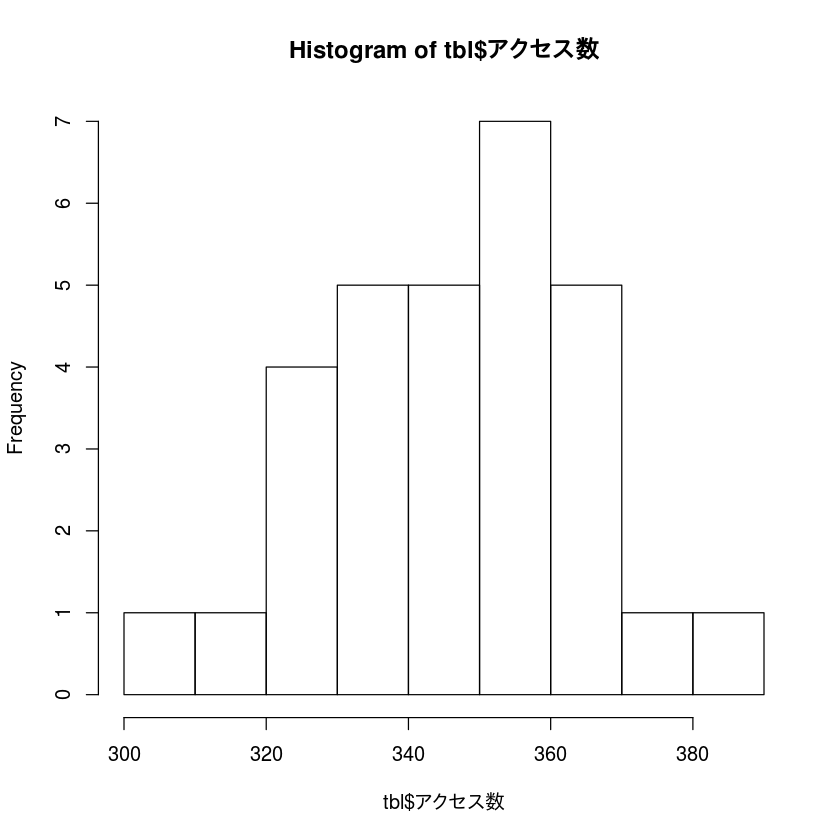

In [12]:
hst <- hist(tbl$アクセス数)

In [13]:
hst

$breaks
 [1] 300 310 320 330 340 350 360 370 380 390

$counts
[1] 1 1 4 5 5 7 5 1 1

$density
[1] 0.003333333 0.003333333 0.013333333 0.016666667 0.016666667 0.023333333
[7] 0.016666667 0.003333333 0.003333333

$mids
[1] 305 315 325 335 345 355 365 375 385

$xname
[1] "tbl$アクセス数"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

In [14]:
freq <- data.frame(
                   "階級値"=hst$mids, # 階級値の列
                   "度数"=hst$counts  # 度数の列
                   )

In [15]:
freq

階級値,度数
305,1
315,1
325,4
335,5
345,5
355,7
365,5
375,1
385,1


In [21]:
# 相対度数を求める
rela_freq <- hst$counts / length(tbl$アクセス数)

# 累積相対度数を求める
cumu_freq <- cumsum(rela_freq)
# 相対度数分布表を作成
freqtable <- data.frame(
  freq,                     # 度数分布表
  "相対度数"=rela_freq,     # 階級ごとの相対度数
  "累積相対度数"=cumu_freq  # 階級ごとの累積相対度数
)

freqtable

階級値,度数,相対度数,累積相対度数
305,1,0.03333333,0.03333333
315,1,0.03333333,0.06666667
325,4,0.13333333,0.20000000
335,5,0.16666667,0.36666667
345,5,0.16666667,0.53333333
355,7,0.23333333,0.76666667
365,5,0.16666667,0.93333333
375,1,0.03333333,0.96666667
385,1,0.03333333,1.00000000


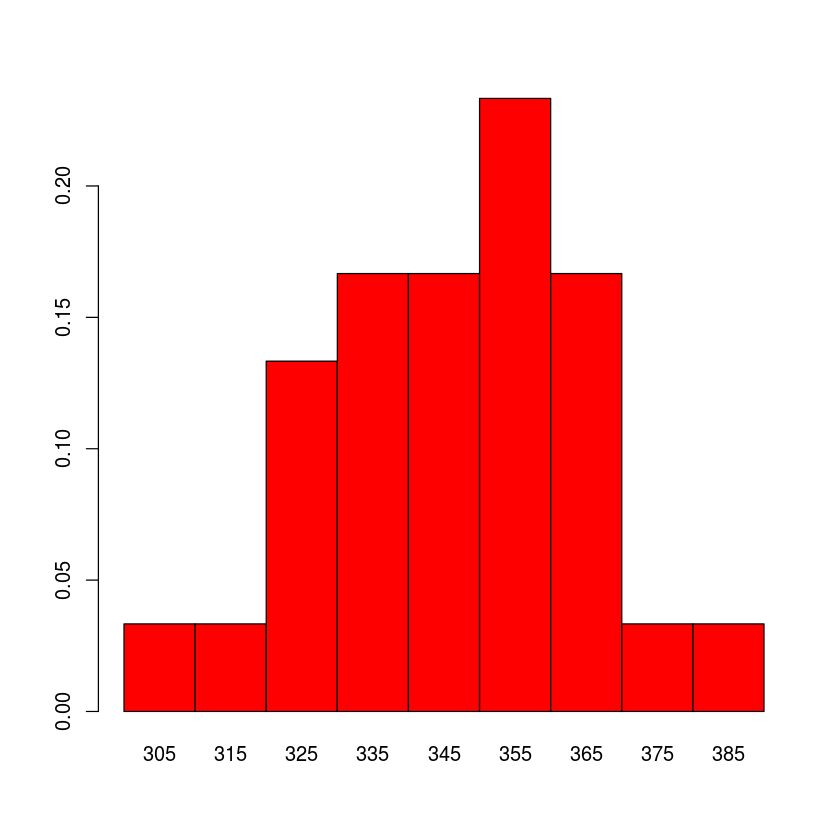

In [22]:
# 相対度数の棒グラフを作成
barplot(
  freqtable$相対度数,          # freqtableの$相対度数の列をグラフにする
  names.arg = freqtable$階級値,# グラフの横軸に階級値を表示
  col = "RED",                 # 棒の色を赤にする
  border = TRUE,               # 棒の境界線を表示
  space = 0                    # 棒と棒の間のスペースを0にする
)

In [25]:
# 店舗別売上.txtをデータフレームとしてdataに代入
data <- read.table(
                    "data/店舗別売上.txt",
                    header=T,
                    fileEncoding="CP932"
                  )
# 平均を求める
average = mean(data$"売上高_千円")

In [26]:
average

[1] 2889.35

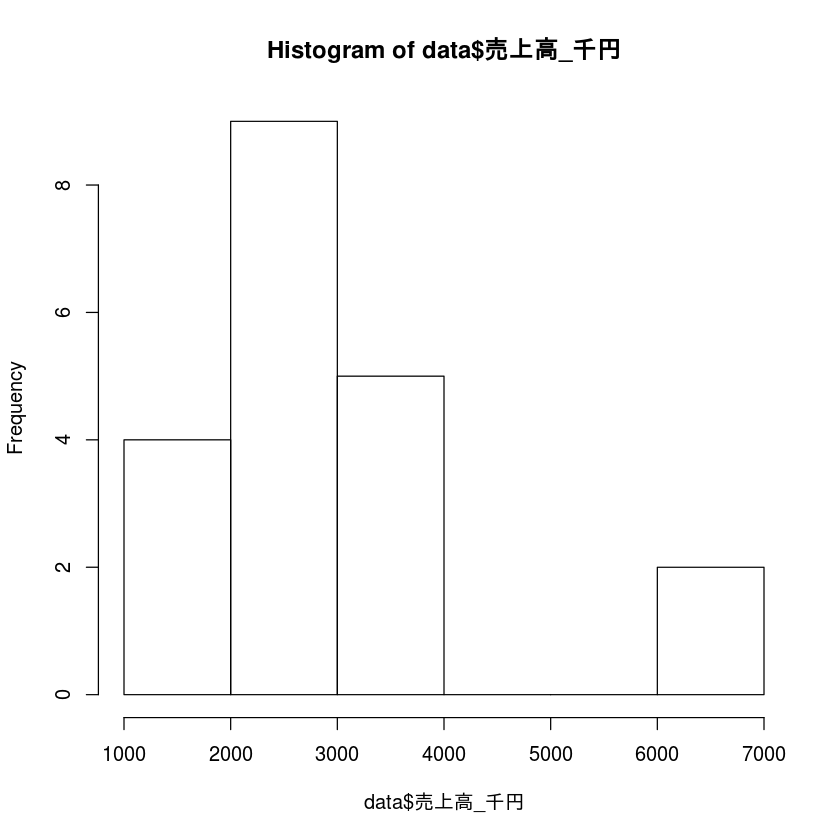

In [27]:
# ヒストグラムを作成
hist(data$"売上高_千円")

In [28]:
# 売上高が0のデータを2件追加
data = rbind(
  data, 
  data.frame(店舗名="dummy", 売上高_千円=0),# 1行ぶんのデータ
  data.frame(店舗名="dummy", 売上高_千円=0) # 1行ぶんのデータ
)

In [32]:
# 上側2件を除いたトリム平均を求める
trim = mean(
  data$"売上高_千円", # 売上高の列を対象にする
  trim = 0.1          # 上側と下側から10％ぶん除外する
)

In [33]:
m = c(1,2,3,4,5,6,7,8,9)
median(m)

[1] 5

In [35]:
m <- median(data$売上高_千円)
cat("中央値", m)

中央値 2406

In [36]:
summary((data$売上高_千円))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1992    2406    2627    3186    6612 

In [37]:
# 3年間の収益率
rate <- c(
  1+(20/100),  # +20％
  1-(30/100),  # -30％
  1+(10/100)   # +10％
)
x <- prod(rate)^(1/length(rate))  # 収益率の幾何平均を求める
cat("平均収益率", x - 1)          # 出力

平均収益率 -0.02600366

In [38]:
speed <- c(110, 90)             # 行きと帰りの速度
hm = length(speed)/sum(1/speed) # 2÷((1÷110)+(1÷90))の計算
cat("平均速度", hm, "km")       # 出力

平均速度 99 km